<a href="https://colab.research.google.com/github/arpitprajapati1/Major-Project/blob/main/Auto_Encoder_for_Image_Cleaning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Major Project for Shri Ram Institute of Science and Technology`***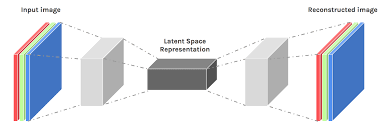

In [ ]:
import tensorflow as tf 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

In [ ]:
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
plt.imshow(X_train[7],cmap = 'gray')

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
Y_train.shape

In [ ]:
Y_test.shape

In [ ]:
i=random.randint(1,60000)
plt.imshow(X_train[i],cmap = 'gray')

In [ ]:
label = Y_train[i]
label

In [ ]:
"""
W_grid = 20
L_grid = 20
fig,axes = plt.subplots(L_grid,W_grid,figsize = (17,17))
axes = axes.ravel()
m_training = len(X_train)
for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0,m_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index],fontsize = 0)
    axes[i].axis('off')
    """
    

In [ ]:
# normalize data
X_train = X_train/255
X_test = X_test/225
X_test.shape 
#X_train

In [ ]:
# add some noise 
noise_factor = 0.3
noisy_data = []
for img in X_train:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0,1)
    noisy_data.append(noisy_image)
    
noise_train_data= np.array(noisy_data)
noise_train_data.shape

In [ ]:
plt.imshow(noise_train_data[21],cmap = 'gray')

In [ ]:
noisy_test_dataset= []
for img in X_test:
    noisy_image = img + noise_factor*np.random.randn(*img.shape)
    new_noisy = np.clip(noisy_image, 0,1)
    noisy_test_dataset.append(noisy_image) 
noise_test_data= np.array(noisy_data)
noise_test_data.shape

In [ ]:
plt.imshow(noise_test_data[22],cmap = 'gray')

# Making of Model 

---



In [ ]:
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(filters = 16 , kernel_size = 3,strides = 1,padding = 'same',input_shape =(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8 , kernel_size = 3,strides = 1,padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8 , kernel_size = 3,strides = 1,padding = 'same'))
#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16 , kernel_size = 3,strides = 2,padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 1 , kernel_size = 3,strides = 2,activation = 'sigmoid',padding = 'same'))


In [ ]:
from tensorflow.keras import optimizers
autoencoder.compile(loss = 'binary_crossentropy',optimizer = tf.keras.optimizers.Adam(lr = 0.001))
autoencoder.summary

# Traning the Model 

---



In [ ]:
autoencoder.fit(noise_train_data.reshape(-1,28,28,1),X_train.reshape(-1,28,28,1),
               epochs = 10,
               batch_size = 200)

# Making Predictions

---



In [ ]:
predicted = autoencoder.predict(noise_test_data[:10].reshape(-1,28,28,1))  # 28*28 =784

In [ ]:
print(noise_test_data[10].reshape(-1,28,28,1))

In [ ]:
fig,axes = plt.subplots(nrows = 2,ncols = 5,sharex = True,sharey = True,figsize=(10,4))
for images,rows in zip([noise_test_data[:10],predicted],axes):
    for img, ax in zip (images,rows):
        ax.imshow(img.reshape(28,28), cmap = 'Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Saving Model for Using in the **Web App**
---

In [ ]:
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from google.colab import drive
#from oauth2client.client import GoogleCredentials
#
## 1. Authenticate and create the PyDrive client.
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#!ls /content/gdrive/MyDrive

In [ ]:
#drive = GoogleDrive(gauth)
#autoencoder.save('autoencoder.h5')    
#model_file = drive.CreateFile({'title' : 'autoencoder.h5'})
#model_file.SetContentFile('autoencoder.h5')
#model_file.Upload()

In [ ]:
#drive.CreateFile({'id': model_file.get('id')})

In [ ]:
#from google.colab import files
#files.download("autoencoder.h5")

In [ ]:
#autoencoder.save_weights('autoencoder_weight.h5')
#weights_file = drive.CreateFile({'title' : 'autoencoder_weight.h5'})
#weights_file.SetContentFile('autoencoder_weight.h5')
#weights_file.Upload()
#drive.CreateFile({'id': weights_file.get('id')})